In [55]:
import numpy as np
import matplotlib.pylab as plt
import scipy.fftpack as sci
import seaborn as sns
from scipy import stats
import math

%matplotlib inline

import numpy as np

def _compute_dft(in_x,in_y,out_x,inverse=False):
    if not inverse:
        in_y = np.fft.fftshift(in_y) 
        j = -1j
    else:
        in_y = in_y*(1.0/len(in_x))
        j = 1j

    N = len(in_x)
    out_y = np.zeros(len(out_x),dtype=np.complex128)
    for k,f in enumerate(out_x):
        out_y[k] = np.sum(in_y*np.exp(2*j*np.pi*f*in_x))

    return out_y
            
def dft(xt,t=[],f=[],vsamp=1):
    """
    Input 
    -----
    xt    : complex array, input time domain signal
    t     : (opt.) real array, input sample times. 
    f     : (opt.) real array, output sample frequencies
    vsamp : (opt.) float, sampling frequency
            default: 1
    Output
    ------
    Fx    : The discrete fourier transform of the input array

    """
    N = len(xt)
    if (len(t)):
        assert(len(t) == N), "Samples and sample times do not match!"
    else:
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)

    if not (len(f)):
        #vsamp = N/float(np.ceil(t.max() - t.min()))
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)
    
    Fx = _compute_dft(t,xt,f)

    return f,Fx

def idft(Fx,f=[],t=[],vsamp=1):
    """
    Input
    -----
    Fx    : complex array, input frequency domain signal
    f     : (opt.) real array, input sample frequencies
    t     : (opt.) real array, output sample times
    
    Output
    ------
    xt: The time domain signal of the input array

    """
    N = len(Fx)
    if (len(f)):
        assert(len(f) == N), "Samples and sample frequencies do not match!"
    else:
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)

    if not (len(t)):
        #T = N/float(np.ceil(f.max()) - f.min())
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)
    
    xt = _compute_dft(f,Fx,t,inverse=True)

    return t,xt


ARR = []
for i in np.arange(9):
    name = "lab1_" + str(i+1) + "0" + "p_1.npy"
    ARR.append(np.load(name))
    

    

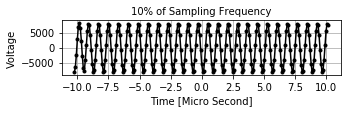

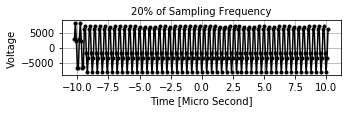

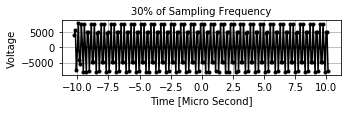

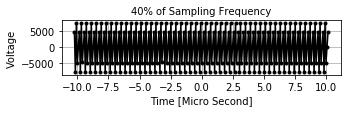

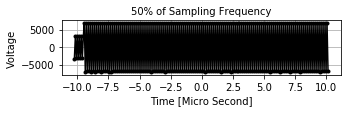

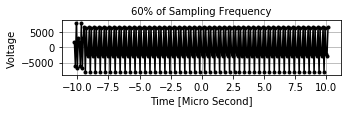

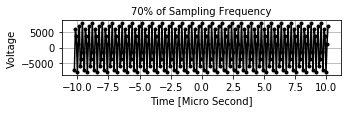

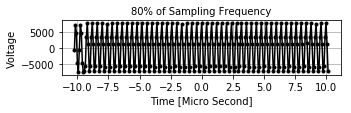

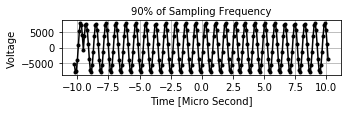

In [56]:
# 3.2 Data Collection
#v_sig = 10% - 90% of v_samp
v_samp = 12.5e6 #12.5Mhz
N=2**8
t = np.linspace(-N/(2*v_samp), ((N/2) - 1)/v_samp, N)
for i in np.arange(9):
    plt.figure(figsize=(5,1))
    plt.plot(t*1e6, ARR[i][0:N], 'k.-')
    plt.title(str(i+1) +"0% of Sampling Frequency", fontsize=10)
    plt.ylabel("Voltage", fontsize=10)
    plt.xlabel("Time [Micro Second]", fontsize=10)
    plt.grid(True)
    plt.show()

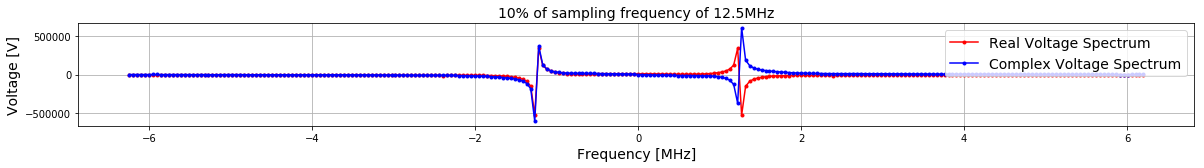

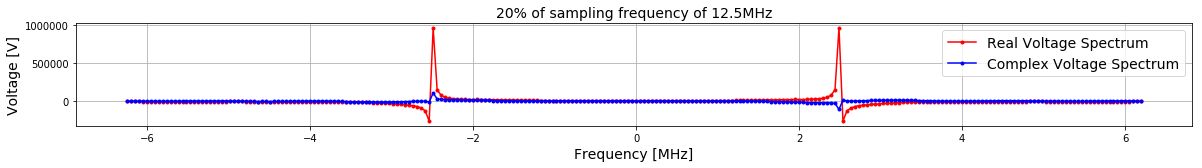

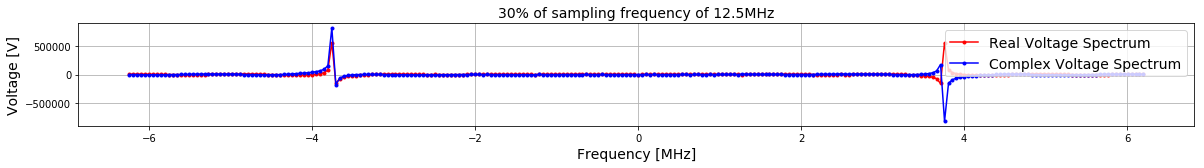

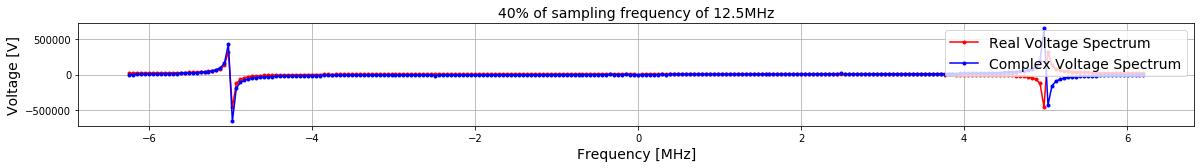

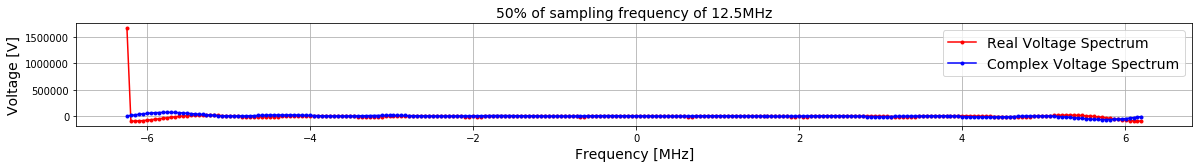

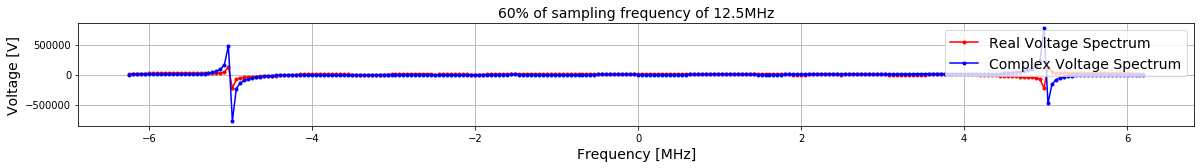

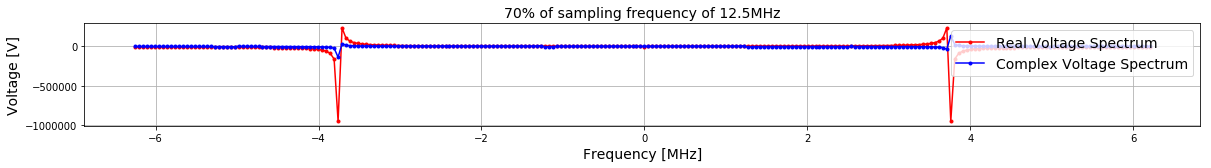

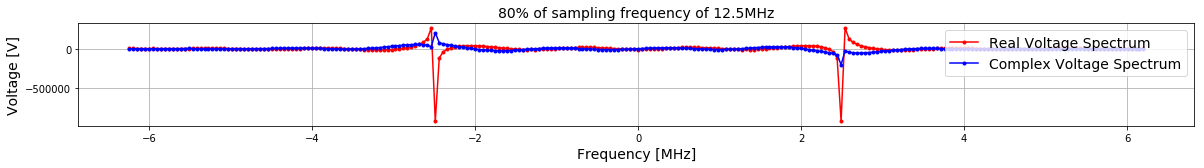

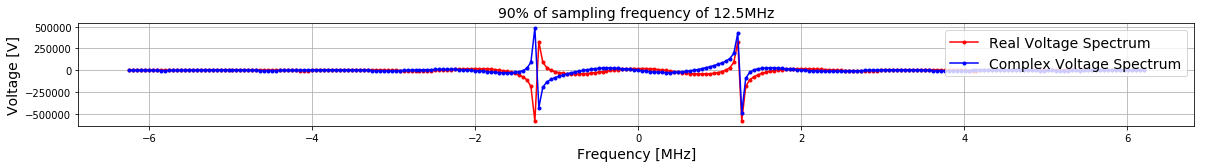

In [57]:
#3.3 Voltage Spectrum
N = 2**8
f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
for i in range(1,10):
    EF = dft(ARR[i-1][0:N])
    real = []
    imag = []
    for num in EF[1]:
        real.append(num.real)
        imag.append(num.imag)
    lit = 910 + i
    plt.figure(figsize=(20,20))
    plt.subplot(lit)
    plt.plot(f/1e6, real, 'r.-')
    plt.plot(f/1e6, imag, 'b.-')
    plt.xlabel('Frequency [MHz]',fontsize = 14)
    plt.ylabel('Voltage [V]',fontsize = 14)
    plt.legend(['Real Voltage Spectrum','Complex Voltage Spectrum'],loc='upper right',fontsize = 14)
    plt.title(str(i) + '0% of sampling frequency of 12.5MHz',fontsize = 14)
    plt.grid(True)
    plt.show()

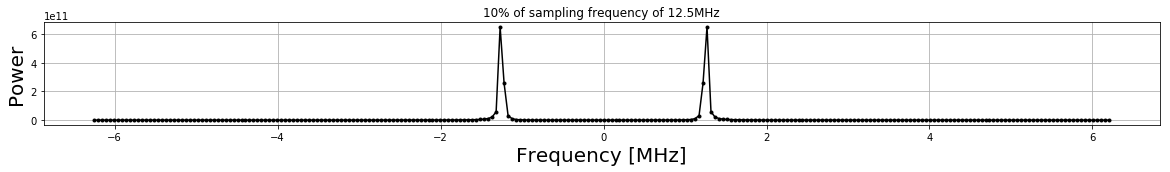

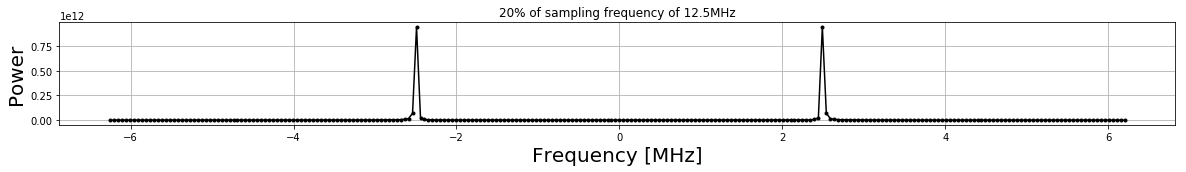

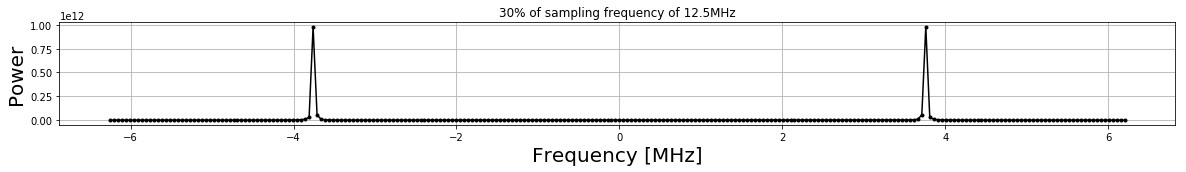

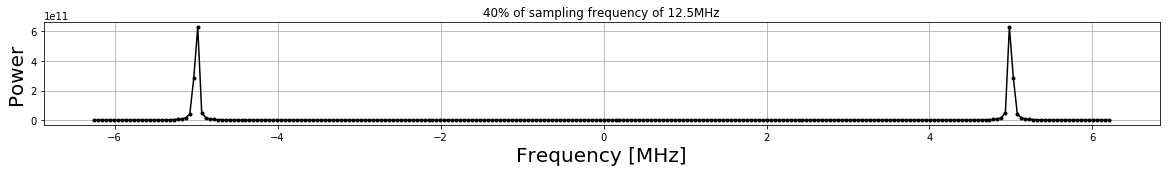

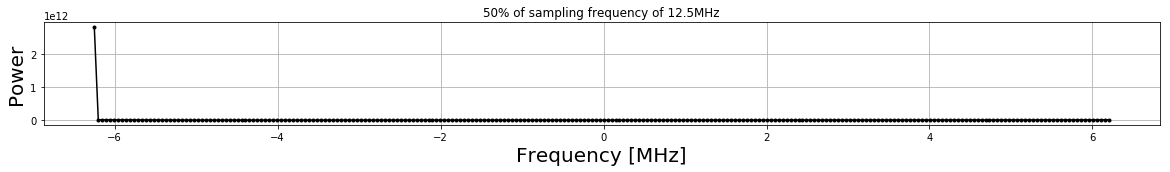

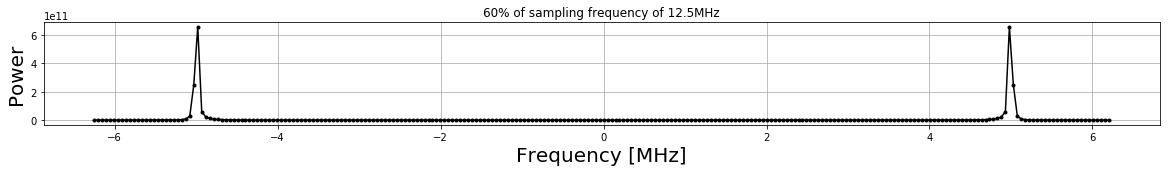

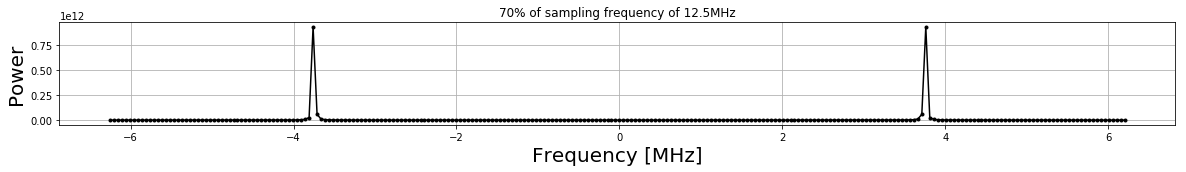

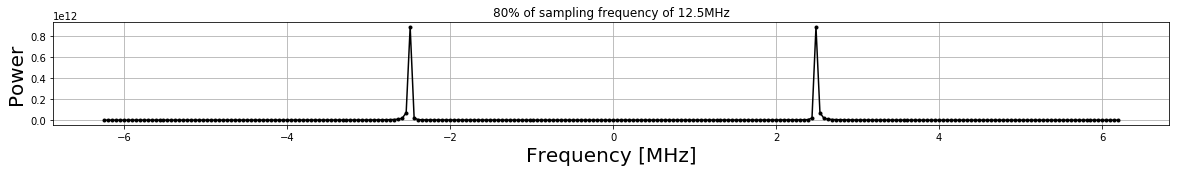

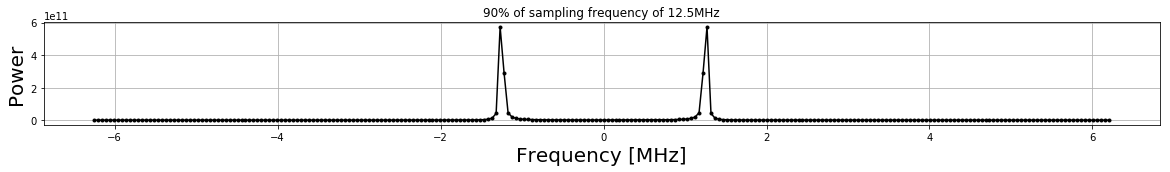

In [58]:
#3.3 Power Spectra

def get_FPS(sample):
    N = 2**8
    v_samp = 12.5e6
    f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
    for i in np.arange(9):
        EF = dft(ARR[i][0:sample])
        Power_spectra = np.abs(EF[1])**2
        plt.figure(figsize=[20,20])
        num = 910+i
        plt.subplot(num)
        plt.plot(f/1e6,Power_spectra[0:sample], 'k.-')
        plt.xlabel("Frequency [MHz]",fontsize=20)
        plt.ylabel('Power', fontsize=20)
        plt.title(str(i+1) + '0% of sampling frequency of 12.5MHz')
        plt.grid(True)
        plt.show()
get_FPS(2**8)

In [59]:
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(ARR[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    
    return np.array(PF)


v_samp=12.5e6
N = 16000
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal

print(ARR[0].size)
x = ARR[0]/2**13
acf = np.correlate(x, x, mode='same')
yee = dft(acf,t,f)
# plot ACF

fig = plt.figure(figsize = (10, 10))

plt.plot(f/1e6,power_spectra_block(2)[0],'g.-')
plt.plot(f/1e6,yee[1].real,'b.-')

plt.xlabel('Frequency in (MHz)',fontsize = 30)
plt.ylabel('(V$\mu$)$^2$',fontsize=30)
plt.legend(['Fourier Transform of the ACF of the 1st block','Power Spectrum of the 1st block'],loc='upper right',fontsize=10)
plt.title('Comparison between PS and FT of ACF',fontsize=30)
plt.grid()

80000


AssertionError: Samples and sample times do not match!

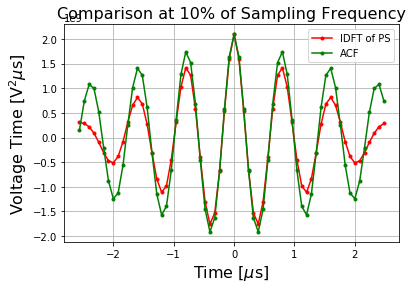

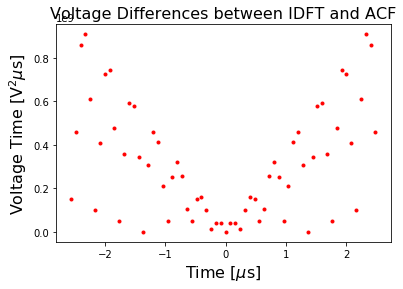

In [75]:
N = 2**6
v_samp = 12.5
f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal

EF = dft(ARR[0][0:N])[1]
Power_spectra = np.abs(EF)**2
iffp = idft(Power_spectra)[1]


##Autocorrelate

y= ARR[0][0:N]
x = y - np.mean(y)
norm = np.sum(x**2)
acf = np.correlate(x, x, 'same')




plt.plot(t, iffp.real, 'r.-')
plt.plot(t, acf, 'g.-')   
plt.title('Comparison at 10% of Sampling Frequency',fontsize=16)
plt.xlabel('Time [$\mu$s]',fontsize =16)
plt.ylabel('Voltage Time [V$^2$$\mu$s]',fontsize=16)
plt.legend(['IDFT of PS','ACF'], loc = 'upper right')
plt.grid(True)
plt.show()

error = np.abs(acf - iffp)
plt.title('Voltage Differences between IDFT and ACF', fontsize=16)
plt.xlabel('Time [$\mu$s]',fontsize=16)
plt.ylabel('Voltage Time [V$^2$$\mu$s]',fontsize=16)
plt.plot(t, error, 'r.')

In [ ]:
#3.4 Leakage?

def get_PS_plots_leaks(N):
    
    v_samp = 12.5e6
    f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
    
    for i in np.arange(9):
        EF = dft(ARR[i][0:N])
        Power_spectra = np.abs(EF[1])**2
        
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        
        plt.plot(f/1e6, Power_spectra[0:N],'r.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("Power", fontsize = 20)
     
        plt.ylim(0,6e8)
        plt.title(str(i+1) + '0% of Sampling frequency of 12.5MHz')
        plt.show()

get_PS_plots_leaks(2**11)

In [ ]:
#3.5 Frequency Resolution
vsamp = 12.5 #in nano second
t = np.linspace(-N/(2*v_samp), ((N/2) - 1)/v_samp, N)
for i in np.arange(2,8):
    f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/(2**i))), 2**i)
    data35 = np.load('3.5data.npy')[0:2**i]
    fft35 = dft(data35)[1]
    power35 = np.abs(fft35)**2
    plt.plot(f, power35)
    plt.title('Samples at 2^' + str(i),fontsize =17)
    plt.xlabel('Frequency[MHz]', fontsize =17)
    plt.ylabel('Power', fontsize =17)
    plt.grid(True)
    plt.show()


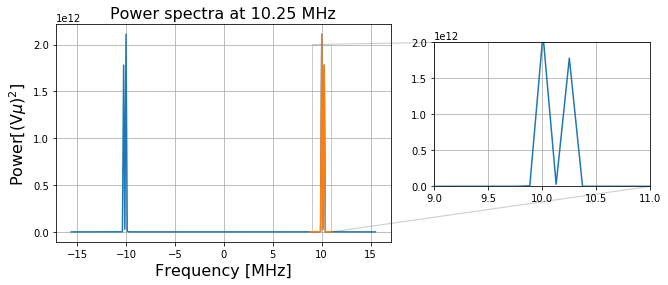

In [127]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#NEW SPECTRAL RESOLUTION
N=2**8
v_samp = 31.25
f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
data1=np.load('3.5data10-10.1.npy')[0:N]
data2=np.load('3.5data10-10.25.npy')[0:N]

fft1 = dft(data1)[1]
fft2 = dft(data2)[1]

power1 = np.abs(fft1)**2
power2 = np.abs(fft2)**2


fig, ax = plt.subplots()

ax.plot(f,power2)
plt.grid(True)
plt.title('Power spectra at 10.25 MHz',fontsize=16)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]',fontsize=16)

axins = inset_axes(ax,
                  3.,2,
                  loc = 8,
                  bbox_to_anchor = (1.25,.3),
                  bbox_transform = ax.figure.transFigure)

mark_inset(ax,
           axins,
           loc1 = 2,
           loc2 = 4,
           ec = "0.3",
           alpha= 0.3)

axins.plot(f,power2)
axins.set_xlim([9,11])
axins.set_ylim([0,2e12])

S = 200
ax.plot(f[S:220], power2[S:220])
plt.grid(True)
plt.show()



3.6 Nyquist Windows

C:\Users\verde\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


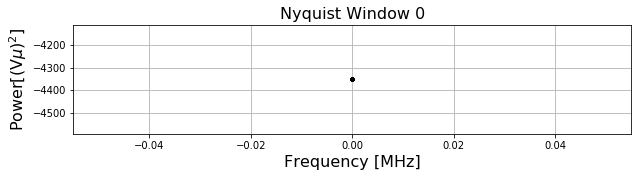

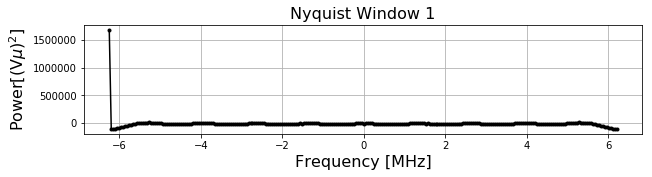

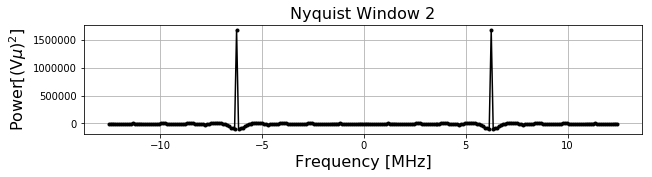

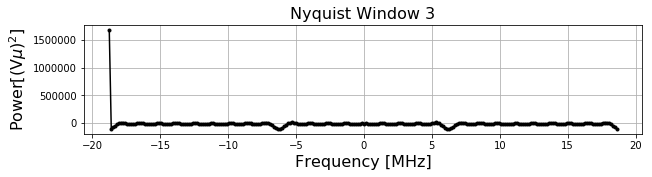

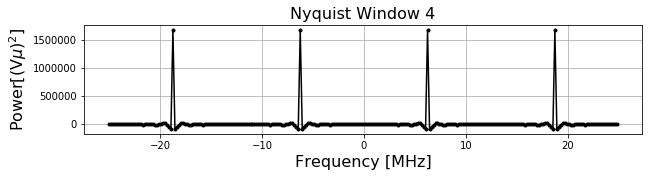

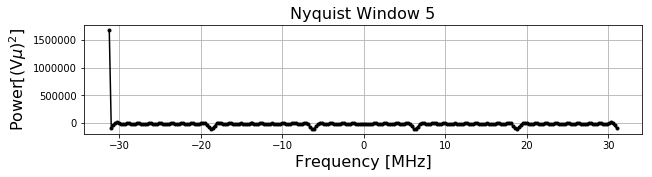

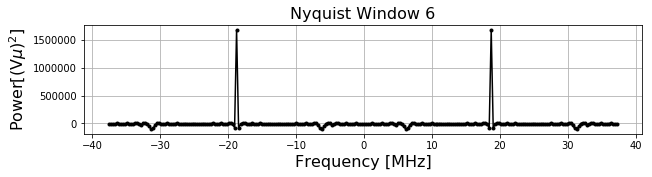

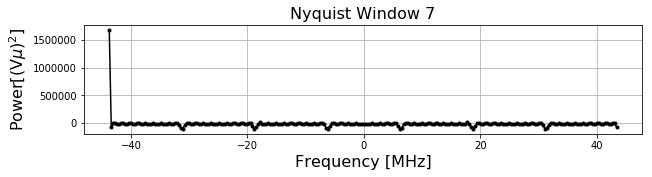

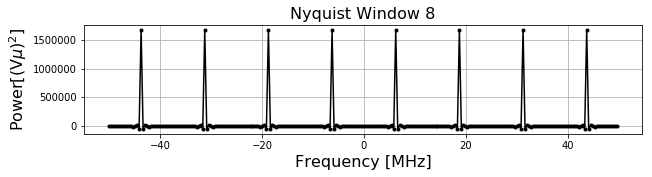

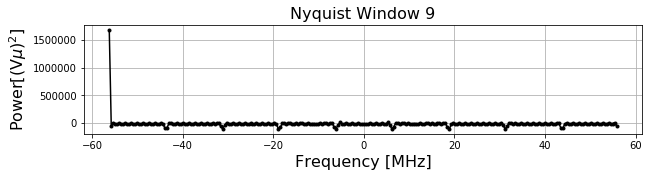

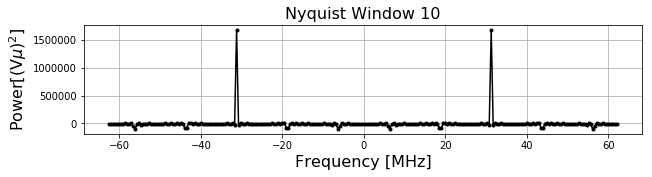

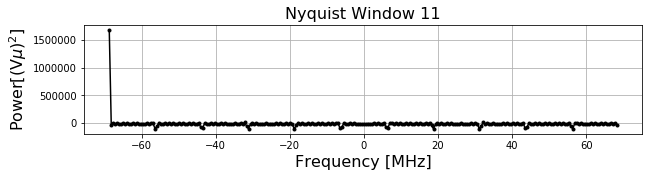

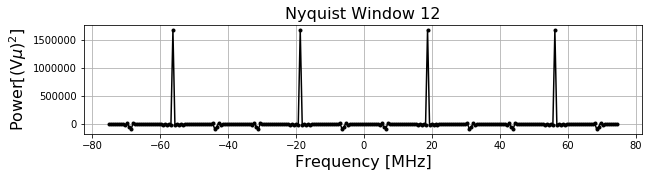

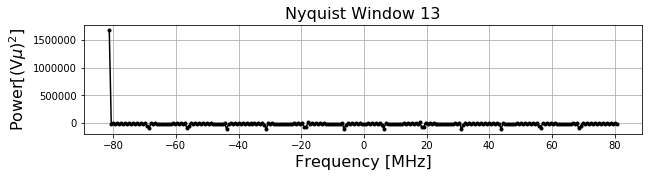

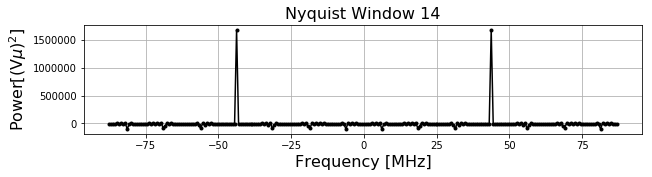

In [134]:

v_samp = 12.5 #12.5Mhz
N=2**8
t = np.linspace(-N/(2*v_samp), ((N/2) - 1)/v_samp, N)
    
for i in np.arange(15):
    f = np.linspace(-(i*v_samp/2), (i*v_samp/2)*(1-(2/N)), N)
    
    plt.figure(figsize=[10,2])
    plt.plot(f, dft(ARR[4][0:N].real,t, f)[1], 'k.-')
    plt.title('Nyquist Window ' + str(i),fontsize=16)
    plt.ylabel("Power[(V$\mu$)$^2$]",fontsize=16)
    plt.xlabel('Frequency [MHz]',fontsize=16)
    plt.grid(True)
    plt.show()
    
#windows that are powers of two produces that amount of spikes in 50% Number of windows will produce that number of spikes in 50%

My mean of d0 is 305.152
My squared mean of d0 is 6736576.512
My RMS of d0 is 2595.49157425


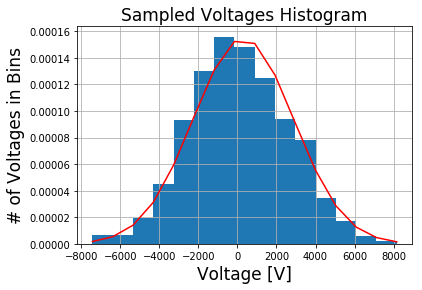

93025


In [171]:
#3.7 FTs of Noise

data = np.load('data32_real.npz')
d0 = data['arr_0']

#Mean Voltage, Mean square and RMS
d0mean = np.mean(d0)
print('My mean of d0 is ' + str(d0mean))
d0mean = np.mean(np.array([d0[i]**2 for i in np.arange(len(d0))]))
print('My squared mean of d0 is ' + str(np.mean(np.array([d0[i]**2 for i in np.arange(len(d0))]))))
d0rms = np.sqrt(d0mean)
print('My RMS of d0 is ' + str(d0rms))

#Histogram

mu, sigma = np.mean(d0), np.sqrt(np.var(d0)) # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.grid(True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), color='r')
plt.title("Sampled Voltages Histogram", fontsize=17)
plt.xlabel('Voltage [V]',fontsize=17)
plt.ylabel('# of Voltages in Bins',fontsize=17)
plt.show()

print(305**2)
#Normalized

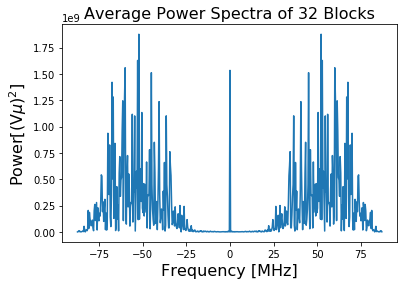

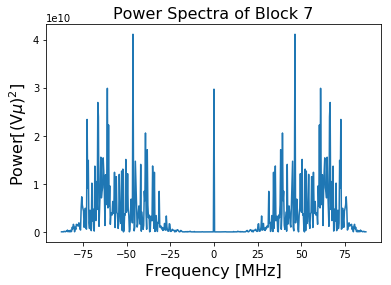

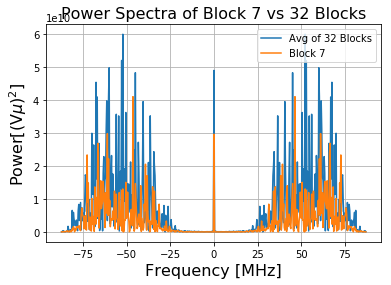

-3218046976.0
0.0664911313473


In [355]:

data32 = np.load('data32_real.npz')
arr16000 = (data32['arr_0'])
arr16000 = arr16000.astype(float)
arr32_16000 = (data32['arr_1'])
arr32_16000 = arr32_16000.astype(float)
f = np.linspace(-(i*v_samp/2), (i*v_samp/2)*(1-(2/N)), N)
N=2**9

for i in np.arange(32):
    fft = dft(arr32_16000[i][0:N])[1]
    power = np.abs(fft)**2
    power = power + power
    
plt.plot(f,power/32)
plt.title('Average Power Spectra of 32 Blocks',fontsize=16)
plt.ylabel("Power[(V$\mu$)$^2$]",fontsize=16)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.show()

fft1 = dft(arr32_16000[6][0:N])[1]
power1 = np.abs(fft1)**2
plt.plot(f,power1)
plt.title('Power Spectra of Block 7',fontsize=16)
plt.ylabel("Power[(V$\mu$)$^2$]",fontsize=16)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.show()

plt.plot(f,power)
plt.plot(f,power1)
plt.title('Power Spectra of Block 7 vs 32 Blocks',fontsize=16)
plt.ylabel("Power[(V$\mu$)$^2$]",fontsize=16)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.legend(['Avg of 32 Blocks','Block 7','PS'],loc = 'upper right')
plt.grid(True)
plt.show()
print(np.mean(np.abs(power)/32 - np.abs(power1)))
print(np.mean(np.abs(power/32))/np.mean(np.abs(power1)))

3604062769.42


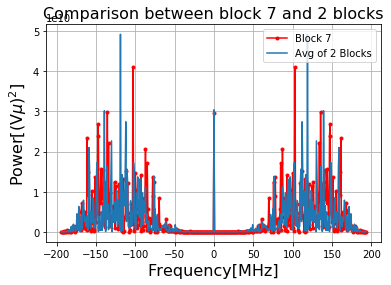

2875799077.18


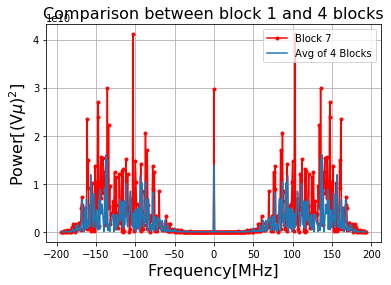

2585444352.0


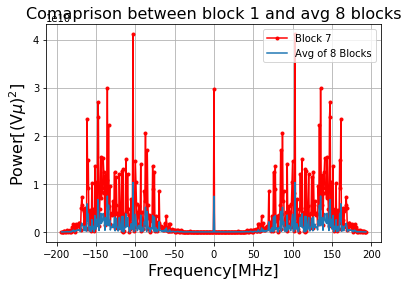

3096565374.8


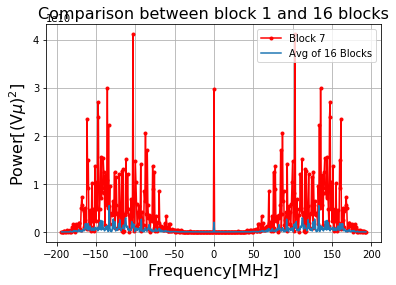

0.922168780061
0.543193095188
0.25
0.126014714549
-268304384.0
-1574731776.0
-2585444352.0
-3012853760.0


In [354]:
for i in np.arange(1):
    fft2 = dft(arr32_16000[i][0:N])[1]
    power2 = np.abs(fft2)**2
    power2 = power2 + power2
for i in np.arange(3):
    fft3 = dft(arr32_16000[i][0:N])[1]
    power3 = np.abs(fft3)**2
    power3 = power3 + power3
for i in np.arange(7):
    fft7 = dft(arr32_16000[i][0:N])[1]
    power7 = np.abs(fft7)**2
    power7 = power7 + power7
for i in np.arange(15):
    fft15 = dft(arr32_16000[i][0:N])[1]
    power15 = np.abs(fft15)**2
    power15 = power15 + power15

plt.plot(f,power1, 'r.-')
plt.plot(f,power2/2)
power22 = power2/2
print(np.mean(np.abs(power2/2 - power1)))
plt.xlabel('Frequency[MHz]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Comparison between block 7 and 2 blocks', fontsize=16)
plt.legend(['Block 7','Avg of 2 Blocks','PS'],loc = 'upper right')
plt.grid(True)
plt.show()

plt.plot(f,power1, 'r.-')
plt.plot(f,power3/4)
print(np.mean(np.abs((power3/4) - power1)))

plt.xlabel('Frequency[MHz]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Comparison between block 1 and 4 blocks', fontsize=16)
plt.legend(['Block 7','Avg of 4 Blocks','PS'],loc = 'upper right')
plt.grid(True)
plt.show()

plt.plot(f,power1, 'r.-')
plt.plot(f,power7/8)
print(np.mean(np.abs((power7/8) - power1)))

plt.xlabel('Frequency[MHz]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Comaprison between block 1 and avg 8 blocks', fontsize=16)
plt.legend(['Block 7','Avg of 8 Blocks','PS'],loc = 'upper right')
plt.grid(True)
plt.show()

plt.plot(f,power1, 'r.-')
plt.plot(f,power15/16)
print(np.mean(np.abs((power15/16) - power1)))

plt.xlabel('Frequency[MHz]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Comparison between block 1 and 16 blocks', fontsize=16)
plt.legend(['Block 7','Avg of 16 Blocks','PS'],loc = 'upper right')
plt.grid(True)
plt.show()

print(np.mean(np.abs(power2/2))/np.mean(np.abs(power1)))
print(np.mean(np.abs(power3/4))/np.mean(np.abs(power1)))
print(np.mean(np.abs(power7/8))/np.mean(np.abs(power1)))
print(np.mean(np.abs(power15/16))/np.mean(np.abs(power1)))


C:\Users\Eden\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


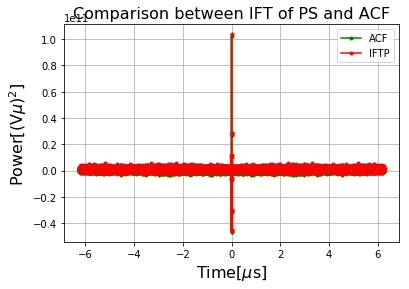

In [360]:
N =16000
v_samp = 12.5
f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal


fft1 = dft(arr32_16000[6][0:N])[1]
power1 = np.abs(fft1)**2
iffp = idft(power1)[1]

y= arr32_16000[6][0:N]
x = y - np.mean(y)
norm = np.sum(x**2)
acf = np.correlate(x, x, 'same')

plt.xlabel('Time[$\mu$s]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Comparison between IFT of PS and ACF', fontsize=16)

plt.plot(f,acf, 'g.-')
plt.plot(f, iffp, 'r.-')
plt.legend(['ACF','IFTP','PS'],loc = 'upper right')
plt.grid(True)
plt.show()

In [368]:
print(np.abs(np.mean(acf/iffp)))

0.734399867679


256


C:\Users\verde\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


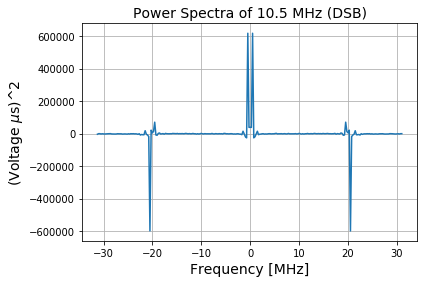

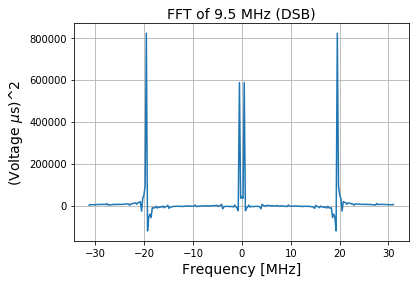

Every period is about 0.04878048780487805 Seconds


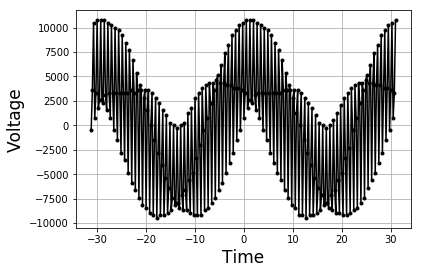

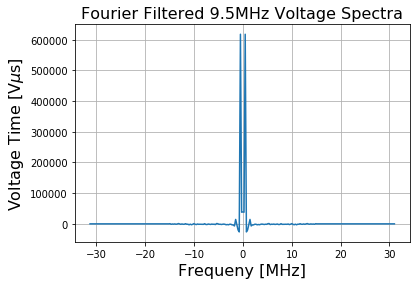

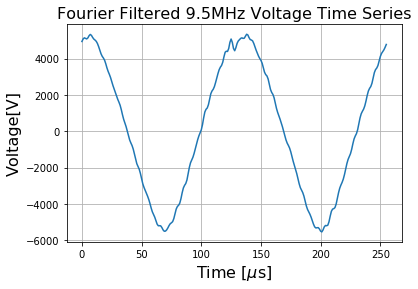

In [151]:
#5.1
v_samp = 62.5
N = 2**8
f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)

data1 = np.loadtxt('5_1_10_5.txt')[0:N]
data2 = np.loadtxt('5_1_9_5.txt')[0:N]

fft1 = dft(data1)[1]
fft2 = dft(data2)[1]
print(data1.size)
powerspec1 = np.abs(fft1)**2
powerspec2 = np.abs(fft2)**2

plt.xlabel('Frequency [MHz]',fontsize=14)
plt.ylabel('(Voltage $\mu$s)^2',fontsize=14)
plt.title('Power Spectra of 10.5 MHz (DSB)', fontsize=14)
plt.plot(f, fft1)
plt.grid(True)
plt.show()

plt.xlabel('Frequency [MHz]',fontsize=14)
plt.ylabel('(Voltage $\mu$s)^2',fontsize=14)
plt.title('FFT of 9.5 MHz (DSB)', fontsize=14)
plt.grid(True)
plt.plot(f, fft2)
plt.show()

plt.plot(f, data1, 'k.-')
plt.xlabel('Time',fontsize=17)
plt.ylabel('Voltage',fontsize=17)
period = 1/20.5
print('Every period is about', period, 'Seconds')
plt.grid(True)
plt.show()

# plt.plot(f, powerspec1, 'k.-')
# plt.xlabel('Frequency[MHz]',fontsize=17)
# plt.ylabel('Voltage Time',fontsize=17)
# plt.grid(True)
# plt.show()

# cutfft = []
# for i in np.arange(len(fft1)):
#     if fft1[i] < 200 && fft[i] > 50:
#         cutfft.append(fft[i])
    
cutfft = fft1.copy()    
cutfft[(abs(f) > 15)] = 0
cut_signal = idft(cutfft)[1]


plt.plot(f, cutfft)
plt.title('Fourier Filtered 9.5MHz Voltage Spectra', fontsize=16)
plt.xlabel('Frequeny [MHz]', fontsize=16)
plt.ylabel('Voltage Time [V$\mu$s]', fontsize=16)
plt.grid(True)
plt.show()

plt.title('Fourier Filtered 9.5MHz Voltage Time Series', fontsize=16)
plt.xlabel('Time [$\mu$s]', fontsize=16)
plt.ylabel('Voltage[V]', fontsize=16)
plt.grid(True)
plt.plot(cut_signal)
plt.show()

Every period is about 0.04878048780487805 Seconds


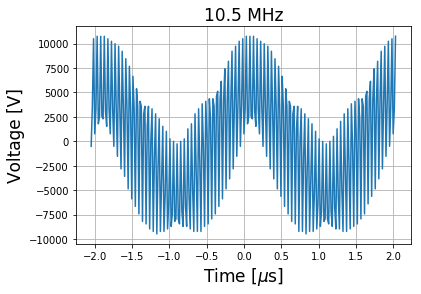

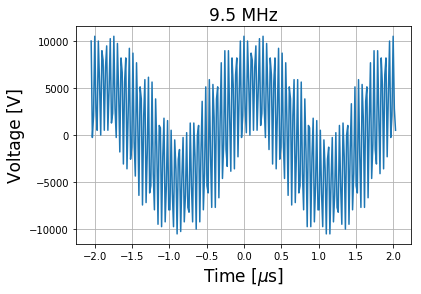

In [382]:
plt.plot(t, data1)
plt.xlabel('Time [$\mu$s]',fontsize=17)
plt.ylabel('Voltage [V]',fontsize=17)
period = 1/20.5
plt.title('10.5 MHz',fontsize=17)
print('Every period is about', period, 'Seconds')
plt.grid(True)
plt.show()

plt.plot(t, data2)
plt.xlabel('Time [$\mu$s]',fontsize=17)
plt.ylabel('Voltage [V]',fontsize=17)
plt.title('9.5 MHz',fontsize=17)
plt.grid(True)
plt.show()

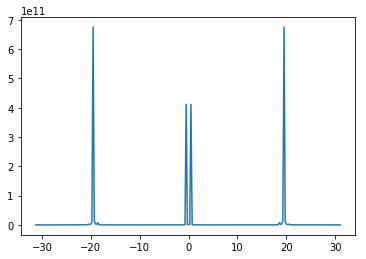

In [152]:
plt.plot(f,powerspec2)
plt.show()

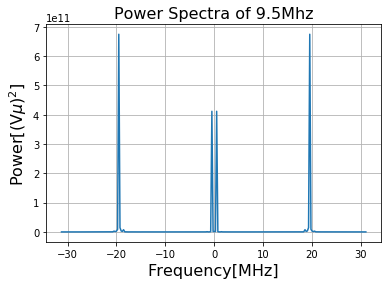

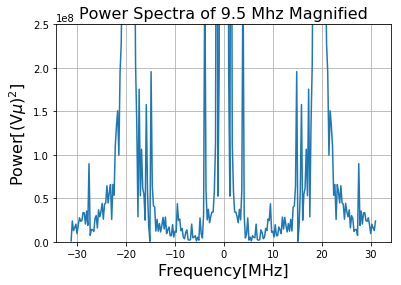

In [158]:
#5.2
plt.plot(f,powerspec2)
plt.title('Power Spectra of 9.5Mhz',fontsize=16)
plt.xlabel('Frequency[MHz]',fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]',fontsize=16)
plt.grid(True)
plt.show()

plt.plot(f, powerspec2)
plt.title('Power Spectra of 9.5 Mhz Magnified',fontsize=16)
plt.xlabel('Frequency[MHz]',fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]',fontsize=16)
plt.grid(True)
plt.ylim(0,.25e9)
plt.show()

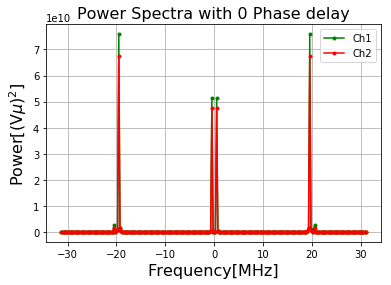

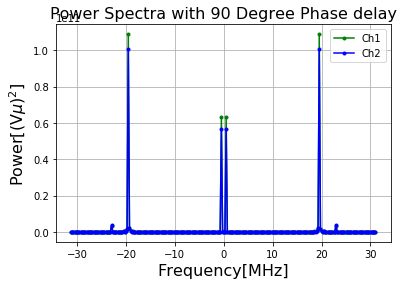

In [169]:
#5.3 Read with 2 V
# 0 Phase shift with 0.7mV amplitude and 10Mhz as LO and 9.5MHz as RF
N=2**8
a = np.genfromtxt('5.31.txt')[:16000] #Channel 1
b = np.genfromtxt('5.31.txt')[16000:] #Channel 2
#plt.figure(figsize=(14,10))
plt.plot(f, np.abs(dft(a[0:N])[1])**2, 'g.-')
plt.plot(f, np.abs(dft(b[0:N])[1])**2, 'r.-')

plt.xlabel('Frequency[MHz]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Power Spectra with 0 Phase delay', fontsize=16)
plt.legend(['Ch1','Ch2','PS'],loc = 'upper right')
plt.grid(True)
plt.show()

 #90 Phase shift with 0.7mV amplitude and 10Mhz as LO and 9.5MHz as RF
N=2**8
g = np.genfromtxt('5.34.txt')[:16000] #Channel 1
h = np.genfromtxt('5.34.txt')[16000:] #Channel 2

plt.plot(f, np.abs(dft(g[0:N])[1])**2, 'g.-')
plt.plot(f, np.abs(dft(h[0:N])[1])**2, 'b.-')

plt.xlabel('Frequency[MHz]', fontsize=16)
plt.ylabel('Power[(V$\mu$)$^2$]', fontsize=16)
plt.title('Power Spectra with 90 Degree Phase delay', fontsize=16)
plt.legend(['Ch1','Ch2','PS'],loc = 'upper right')
plt.grid(True)

plt.show()


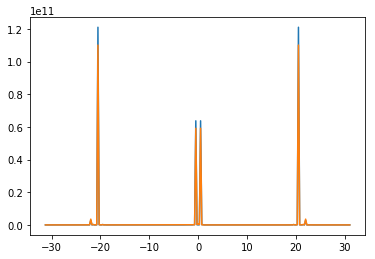

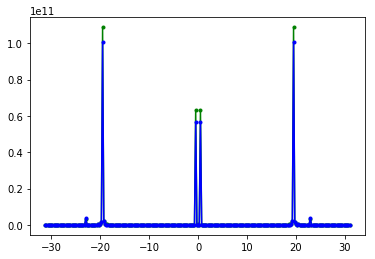

In [25]:
# 90 Phase shift with 0.7mV amplitude and 10Mhz as LO and 10.5MHz as RF
N=2**8
f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
e = np.genfromtxt('5.32.txt')[:16000] #Channel 1
ff = np.genfromtxt('5.32.txt')[16000:] #Channel 2
#.figure(figsize=(14,10))
plt.plot(f, np.abs(dft(e[0:N])[1])**2)
plt.plot(f, np.abs(dft(ff[0:N])[1])**2)
plt.show()
# 0 Phase shift with 0.7mV amplitude and 10Mhz as LO and 10.5MHz as RF
N=2**8
c = np.genfromtxt('5.32_2.txt')[:16000] #Channel 1
d = np.genfromtxt('5.32_2.txt')[16000:] #Channel 2
#plt.figure(figsize=(14,10))
plt.plot(c[0:N])
plt.plot(d[0:N])
plt.show()

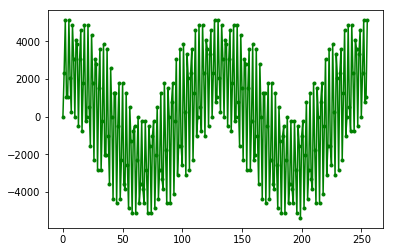

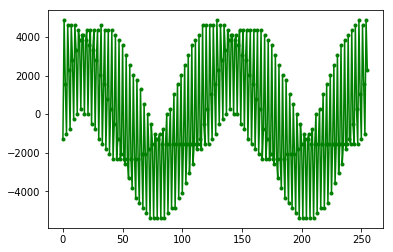

In [21]:
#Long Cable 9.5MHz
N=2**8
data51 = np.genfromtxt('5.1_1.txt') #Channel 1
#.figure(figsize=(14,10))
plt.plot(data51[0:N], 'g.-')
plt.show()
#Long Cable 10.5MHz
data52 = np.genfromtxt('5.1_2.txt') #Channel 1
#.figure(figsize=(14,10))
plt.plot(data52[0:N], 'g.-')
plt.show()